\newpage

1.

In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [338]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets
  
# metadata
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [339]:
print(X.dtypes)

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object


- 'age' (Integer) is the age of people in years.
- 'bp' (Integer) is the blood pressure in mm/Hg.
- 'sg' (Categorical) is the specific gravity of human body.
- 'al' (Categorical) is the albumin level.
- 'su' (Categorical) is the sugar level.
- 'rbc' (Binary) is the situation of red blood cells for humans.
- 'pc' (Binary) is the situation of pus cell for humans.
- 'pcc' (Binary) is the situation of pus cell clumps for humans.
- 'ba' (Binary) is the situation of bacteria.
- 'bgr' (Integer) is the blood glucose random in mgs/dl.
- 'bu' (Integer) is the blood urea in mgs/dl.
- 'sc' (Continuous) is the serum creatinine.  
- 'sod' (Integer) is the sodium in human body in mEq/L.
- 'pot' (Continuous) is the potassium in human body in mEq/L.
- 'hemo' (Continuous) is the hemoglobin in human body in gms.
- 'pcv' (Integer) is the packed cell volume.  
- 'wbcc' (Integer) is the white blood cell count.  
- 'rbcc' (Continuous) is the red blood cell count.  
- 'htn' (Binary) is the situation of hypertension.  
- 'dm' (Binary) is the situation of diabetes mellitus.  
- 'cad' (Binary) is the situation of coronary artery disease.  
- 'appet' (Binary) is the situation of appetite.  
- 'pe' (Binary) is the situation of pedal edema.  
- 'ane' (Binary) is the situation of anemia.
- 'class' (our target classification) is the situation of Chronic Kidney Disease, namely CKD.(have CKD or not have).

In this case, our classification problem is to classify observations into two groups: who has early stage chronic kidney disease and who does not. Also, we can classify the observations into two groups based on anemia: who has anemia and who does not.

2.

In [340]:
# separate variables into float and object
float_variables = X.select_dtypes(include=['float64']).columns
object_variables = X.select_dtypes(include=['object']).columns

print(X[object_variables].head(10))

        rbc        pc         pcc          ba  htn   dm cad appet   pe  ane
0       NaN    normal  notpresent  notpresent  yes  yes  no  good   no   no
1       NaN    normal  notpresent  notpresent   no   no  no  good   no   no
2    normal    normal  notpresent  notpresent   no  yes  no  poor   no  yes
3    normal  abnormal     present  notpresent  yes   no  no  poor  yes  yes
4    normal    normal  notpresent  notpresent   no   no  no  good   no   no
5       NaN       NaN  notpresent  notpresent  yes  yes  no  good  yes   no
6       NaN    normal  notpresent  notpresent   no   no  no  good   no   no
7    normal  abnormal  notpresent  notpresent   no  yes  no  good  yes   no
8    normal  abnormal     present  notpresent  yes  yes  no  good   no  yes
9  abnormal  abnormal     present  notpresent  yes  yes  no  poor   no  yes


In [341]:
# transfer categorical data into 0 or 1
transfer_c_n = {
    'rbc': {'abnormal':0, 'normal':1},
    'pc': {'abnormal':0, 'normal':1},
    'pcc': {'notpresent':0, 'present':1},
    'ba': {'notpresent':0, 'present':1},
    'htn': {'no':0, 'yes':1},
    'dm': {'no':0, 'yes':1},
    'cad': {'no':0, 'yes':1},
    'appet': {'poor':0, 'good':1},
    'pe': {'no':0, 'yes':1},
    'ane': {'no':0, 'yes':1},
}

In [342]:
# transfer X into dataframe
X1=pd.DataFrame(X)

# transfer categorical data into numerical data
for column, mapping in transfer_c_n.items():
    if column in X1.columns:
        X1[column] = X1[column].map(mapping)

3.

In [343]:
print(X1.describe())

              age          bp          sg          al          su         rbc  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  248.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142    0.810484   
std     17.169714   13.683637    0.005717    1.352679    1.099191    0.392711   
min      2.000000   50.000000    1.005000    0.000000    0.000000    0.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000    1.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000    1.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000    1.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000    1.000000   

               pc         pcc          ba         bgr  ...        hemo  \
count  335.000000  396.000000  396.000000  356.000000  ...  348.000000   
mean     0.773134    0.106061    0.055556  148.036517  ...   12.526437   
std      0.419431    0.308305    0.229351   79.2

- There are 11 numerical variables and 13 nominal variables in the dataset (also the 'class' variable is nominal).
- There are 400 obeservations and 24 variables in the data set.
- The average age for the observations is 51.48 years, and the maximum age is 90 while the minimum is 2 years old.
- The average blood pressure is 76.47 mm/Hg, and the maximum is 180 mm/Hg while the minimum is 13.68

4.

Text(0.5, 1.0, 'Correlation heatmap')

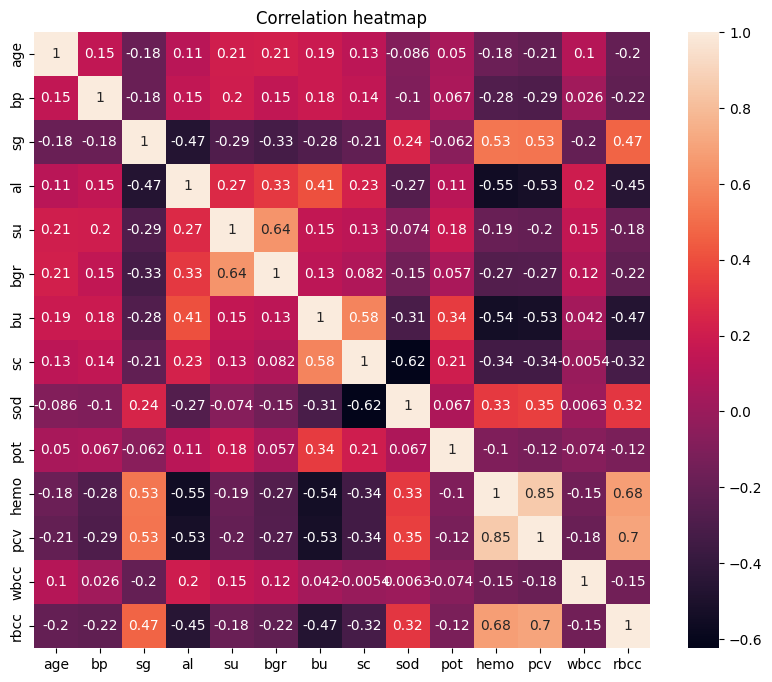

In [344]:
X1_floats = X1[float_variables].apply(lambda x: x.fillna(x.mean()), axis = 0)


plt.figure(figsize = (10, 8))
sns.heatmap(X1_floats.corr(), annot = True, square = True)
plt.title('Correlation heatmap')

-	The variables “hemo” and variable “pcv” have a very high positive correlation which is 0.85. Therefore, they may indicate a similar information about the data.
-	The variable “hemo” has a strong negative correlation with variables “su” and “sc”, which are -0.55 and -0.54 separately. These relationships indicates that when the level of hemoglobin increases, sugar level and serum creatinine level will decrease.
-	The variable “sod” has relatively low correlations with all other variables. This may suggest that this variable will plays an important role in prediction. It might add dimensions to a predictive model of this data.

5.

In [345]:
X1.isnull().sum()
mean = X1.mean()
X2=X1.fillna(mean)

print(X2.head(10))

    age          bp     sg   al   su       rbc        pc  pcc   ba  \
0  48.0   80.000000  1.020  1.0  0.0  0.810484  1.000000  0.0  0.0   
1   7.0   50.000000  1.020  4.0  0.0  0.810484  1.000000  0.0  0.0   
2  62.0   80.000000  1.010  2.0  3.0  1.000000  1.000000  0.0  0.0   
3  48.0   70.000000  1.005  4.0  0.0  1.000000  0.000000  1.0  0.0   
4  51.0   80.000000  1.010  2.0  0.0  1.000000  1.000000  0.0  0.0   
5  60.0   90.000000  1.015  3.0  0.0  0.810484  0.773134  0.0  0.0   
6  68.0   70.000000  1.010  0.0  0.0  0.810484  1.000000  0.0  0.0   
7  24.0   76.469072  1.015  2.0  4.0  1.000000  0.000000  0.0  0.0   
8  52.0  100.000000  1.015  3.0  0.0  1.000000  0.000000  1.0  0.0   
9  53.0   90.000000  1.020  2.0  0.0  0.000000  0.000000  1.0  0.0   

          bgr  ...  hemo   pcv          wbcc      rbcc  htn   dm  cad  appet  \
0  121.000000  ...  15.4  44.0   7800.000000  5.200000  1.0  1.0  0.0    1.0   
1  148.036517  ...  11.3  38.0   6000.000000  4.707435  0.0  0.0  0.0

We choose not to remove missing values since it will reduce the sample size by a large amount. Our original sample size is 400, but the sample size after removing missing value is 158.

6.

In [346]:
Q1 = X2.quantile(0.25)
Q3 = X2.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
X2_no_outliers = X2[(X2 >= lower_bound) & (X2 <= upper_bound)]

# fill NaN with mean value
X2.isnull().sum()
mean2 = X2.mean()
X3=X2.fillna(mean2)

print(X3.head(10))

    age          bp     sg   al   su       rbc        pc  pcc   ba  \
0  48.0   80.000000  1.020  1.0  0.0  0.810484  1.000000  0.0  0.0   
1   7.0   50.000000  1.020  4.0  0.0  0.810484  1.000000  0.0  0.0   
2  62.0   80.000000  1.010  2.0  3.0  1.000000  1.000000  0.0  0.0   
3  48.0   70.000000  1.005  4.0  0.0  1.000000  0.000000  1.0  0.0   
4  51.0   80.000000  1.010  2.0  0.0  1.000000  1.000000  0.0  0.0   
5  60.0   90.000000  1.015  3.0  0.0  0.810484  0.773134  0.0  0.0   
6  68.0   70.000000  1.010  0.0  0.0  0.810484  1.000000  0.0  0.0   
7  24.0   76.469072  1.015  2.0  4.0  1.000000  0.000000  0.0  0.0   
8  52.0  100.000000  1.015  3.0  0.0  1.000000  0.000000  1.0  0.0   
9  53.0   90.000000  1.020  2.0  0.0  0.000000  0.000000  1.0  0.0   

          bgr  ...  hemo   pcv          wbcc      rbcc  htn   dm  cad  appet  \
0  121.000000  ...  15.4  44.0   7800.000000  5.200000  1.0  1.0  0.0    1.0   
1  148.036517  ...  11.3  38.0   6000.000000  4.707435  0.0  0.0  0.0

7.

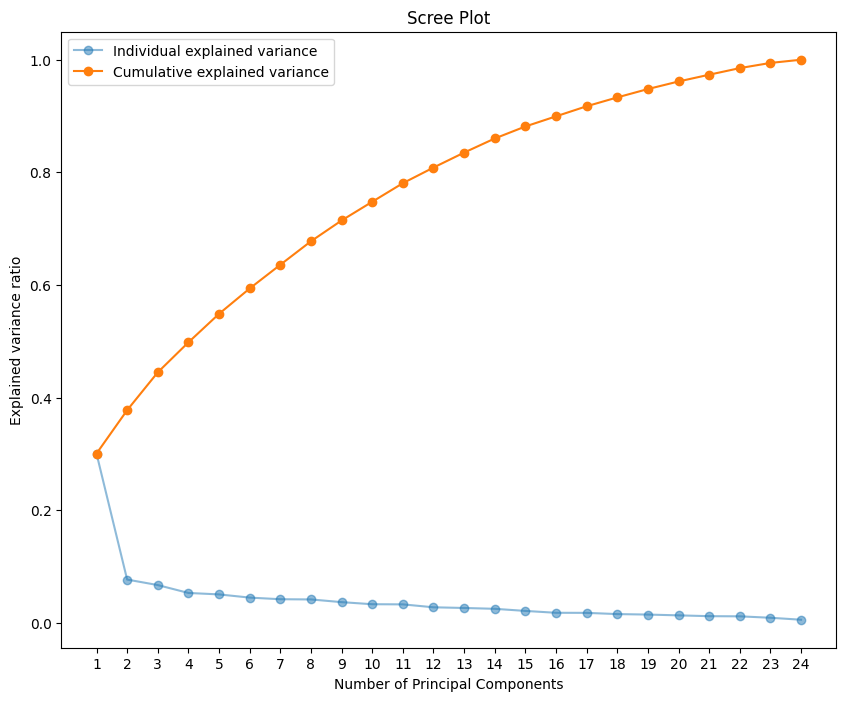

In [347]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X3)

pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize = (10, 8))
plt.plot(range(1, len(explained_variance) + 1),
        explained_variance,
        alpha=0.5,
        marker = 'o',
        label='Individual explained variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1),
        cumulative_explained_variance,
        marker = 'o',
        label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Number of Principal Components')
plt.legend(loc='best')
plt.title('Scree Plot')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

I will choose two principal components. From the scree plot, we can see that there is an “elbow” in the second components on line of cumulative explained variance. This indicates that the explained variance ratio states to decline after this point. The first two components capture most of the variability in the data. Therefore, we will choose 2 clusters for future analysis.

8.

In [348]:
random.seed(1)

X_train, X_test, y_train, y_test = train_test_split(X3,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

9.

Decision tree is a common used method for classification and it can deal with a variety of data types such as discrete variable and continuous variable. Also, random forest has
ability to deal with categorical variables without transforming them at first and also avoids overfitting.

In [349]:
# Initialize and train the decision random forest
rd_clf = RandomForestClassifier(criterion='entropy',
                                max_depth=1,
                                min_samples_leaf=4,
                                min_samples_split=8,
                                n_estimators=29)
rd_clf.fit(X_train, y_train.values.ravel())

# Print the classification report
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Classification Report :- 
               precision    recall  f1-score   support

         ckd       0.99      0.94      0.96        70
      notckd       0.92      0.98      0.95        50

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [350]:
# Initialize and train the decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Predict on the test set
y_pred = dtc.predict(X_test)

# Print the classification report with zero_division set to 0
print(f"Classification Report :
      - \n{classification_report(y_test, y_pred, zero_division=0)}")

Classification Report :- 
              precision    recall  f1-score   support

         ckd       0.97      0.97      0.97        70
        ckd	       0.00      0.00      0.00         0
      notckd       0.98      0.96      0.97        50

    accuracy                           0.97       120
   macro avg       0.65      0.64      0.65       120
weighted avg       0.97      0.97      0.97       120



10.

In [351]:
print(f"Confusion Matrix of random forest :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Confusion Matrix of decision tree :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")

Confusion Matrix of random forest :- 
[[66  4]
 [ 1 49]]

Confusion Matrix of decision tree :- 
[[68  1  1]
 [ 0  0  0]
 [ 2  0 48]]



11.

In [352]:
# use cross-validation method (GridSearchCV function) to find best parameters

dtc=RandomForestClassifier()

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [100, 150, 200]
}

grid_search = GridSearchCV(estimator=dtc,
                           param_grid=param_grid,
                           cv=2,
                           scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best Score: 0.9785714285714286


- Best Parameters: 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100
- Best Score: 0.9785714285714286

Because of the limits in terms of computer operations, we only choose 3 cases that are representative for testing the best parameters in this case.

12.

In [353]:
# Initialize the classifiers
dtc = DecisionTreeClassifier()

# Fit the classifiers to the training data
dtc.fit(X_train, y_train)

# Make predictions on the test set
dtc_predictions = dtc.predict(X_test)

# Calculate and print the accuracy for both classifiers

dtc_acc = accuracy_score(y_test, dtc_predictions)

print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")
print(f"Test Accuracy of Random Forest Classifier is {grid_search.best_score_} \n")

Test Accuracy of Decision Tree Classifier is 0.95 

Test Accuracy of Random Forest Classifier is 0.9785714285714286 



- Random forest method divided the test set into 2 classes, but the decision tree method divided the test set into 3 classes on the confusion matrix.
- Also, the decision tree method has 5 observations misclassified, but the random forest method has 4 observations misclassified according to the confusion matrix.

13.

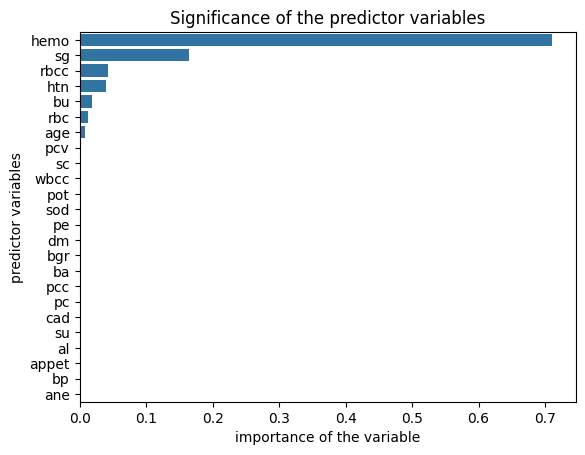

In [354]:
q_13 = DecisionTreeClassifier(max_depth = 7)
q_13.fit(X3, y)

feature_importances = q_13.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X3.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
sns.barplot(x = sorted_importances, y = sorted_feature_names).set(title='Significance of the predictor variables')
plt.xlabel('importance of the variable')
plt.ylabel('predictor variables')
plt.show()

We can see that the hemoglobin in human body, which is the protein contained in red blood cells, has the greatest importance to the forecast of early stage Chronic Kidney
Disease (CKD) for people. Also, the sugar level takes the second lead in this field. However, we can see that there are some factors that have low significance to the
predictions of early stage Chronic Kidney Disease (CKD). Therefore, a challenge related to this is to do the test for those features and better select them.

14.

In [355]:
# use SMOTE method
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=1)
X_res, y_res = sm.fit_resample(X3, y)
X_train, X_test, y_train, y_test = train_test_split(X_res,
                                                    y_res,
                                                    test_size=0.3,
                                                    random_state=1)

In [356]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9821428571428571 

Confusion Matrix :- 
[[74  2  2]
 [ 0 64  0]
 [ 0  0 82]]

Classification Report :- 
               precision    recall  f1-score   support

         ckd       1.00      0.95      0.97        78
        ckd	       0.97      1.00      0.98        64
      notckd       0.98      1.00      0.99        82

    accuracy                           0.98       224
   macro avg       0.98      0.98      0.98       224
weighted avg       0.98      0.98      0.98       224



SMOTE is a method that used to handle imbalanced dataset. From the dataset we have, we can see that there are 250 patients with chronic kidney disease (CKD) and 150 without, there is an imbalance that could potentially be addressed with SMOTE to make the classes more even.

15.

-	Question 1: Jiayi Su
-	Question 2: Xiangyin Xiao
-	Question 3: Jiayi Su
-	Question 4: Xiangyin Xiao, Kesu Yu
-	Question 5: Jiayi Su
-	Question 6: Xiangyin Xiao, Kesu Yu
-	Question 7: Xiangyin Xiao
-	Question 8: Jiayi Su, Kesu Yu
-	Question 9: Jiayi Su, Kesu Yu, (debug: Xiangyin Xiao)
-	Question 10: Jiayi Su, Kesu Yu
-	Question 11: Jiayi Su, Kesu Yu
-	Question 12: Jiayi Su, Kesu Yu, (debug: Xiangyin Xiao)
-	Question 13: Jiayi Su
-	Question 14: Kesu Yu
-	Question 15: Xiangyin Xiao
-	Question 16: Xiangyin Xiao

16.

https://github.com/QueenieXiao/STATS-3DA3-Assignment-6

\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
1.   & Answer [1]\\
2.   & Codes [2] \\
     & OR answer [2]\\
3.   & Codes [3] and answer [3]\\
4.   & Codes [2] and answer [3]\\
5.   & Codes [2]\\
     & OR answer [2]\\
6.   & Codes [2] \\
     & OR answer [2]\\
7.   & Codes [3] and Plot [1]\\
8.   & Codes [1]\\
9.   & Answers [2]\\
10.   & Describe the two metrics [2]\\
11.   & Codes [2] \\
      & these codes can be included in (12)\\
12.   & Codes (two classifiers training,\\
     & model selection for each classifier, \\
     & classifiers comparisons) [5] and answer [2]\\
13.   & Codes [1] and answers [2]\\
14.   & Codes and comparison will \\
     & give \textbf{bonus 2 points for the final grade}.\\
\end{tabular}
\end{table}

**The maximum point for this assignment is 39. We will convert this to 100%.**

**All group members will receive the same grade if they contribute to the same.**
